In [12]:
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
from prettytable import PrettyTable

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒══════════════╤═══════════════════╤═══════════════╕
│   Daily Used │   Daily Remaining │   Daily Limit │
╞══════════════╪═══════════════════╪═══════════════╡
│            2 │                 8 │            10 │
╘══════════════╧═══════════════════╧═══════════════╛


In [3]:
jobs = qmf.search_jobs(name="BEC w/ target")

In [4]:
matters = [qmf.load_matter_from_job_id(job["external_id"]) for job in jobs]
[matter.get_result() for matter in matters]

[None, None, None, None, None, None, None, None, None, None]

In [13]:
temps = np.array([matter.output.temperature for matter in matters])
condensate_num = np.array([matter.output.thermal_atom_number for matter in matters])
total_num = np.array([matter.output.tof_atom_number for matter in matters])

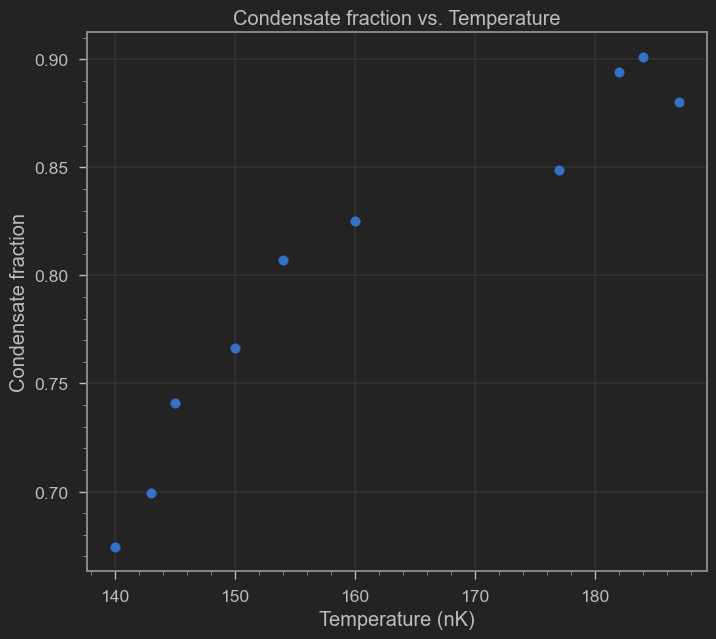

In [35]:
plt.scatter(temps, condensate_num/total_num, zorder = 10)
plt.title("Condensate fraction vs. Temperature")
plt.ylabel("Condensate fraction")
plt.xlabel("Temperature (nK)")
plt.minorticks_on()

In [18]:
from scipy.optimize import curve_fit

In [30]:
def func(x, a, b):
    return b * (1 - (x)**a)

In [34]:
popt, pcov = curve_fit(func, temps, condensate_num/total_num)

In [33]:
popt

array([723.62679856, 162.2       ])